## Estadística Inferencial

Se llama estadística inferencial a la rama de la Estadística encargada de hacer deducciones, es decir, inferir propiedades, conclusiones y tendencias, a partir de una muestra del conjunto. Su papel es interpretar, hacer proyecciones y comparaciones.

### Distribución

Una distribución es una función que muestra los posibles valores para una variable y con que frecuencia ocurren.

Un ejemplo de una distribución son los posibles valores que aparecen al lanzar un dado de 6 caras, estos serían los numeros del 1 al 6. Como solo hay 6 posibles valores y son independientes entre ellos, podemos decir que la probabilidad de que salga un número es de 1/6.

Esto lo podemos representar en una gráfica.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter

from scipy import stats

In [4]:
probabilidades = np.ones(6)/6

probabilidades

array([0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
       0.16666667])

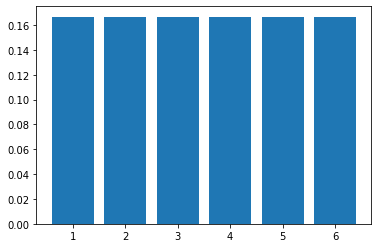

In [5]:
plt.bar(range(1, 7), probabilidades)
plt.show()

**Esta distribución en particular se le conoce como `Distribución Uniforme` porque todos los valores son el mismo.**

Supongamos que ahora tenemos 2 dados, queremos ver cuales son los posibles resultados:

- El menor valor de lanzar 2 dados sería: 2.
- El mayor valor de lanzar 2 dados sería: 12.

In [15]:
# Posibles resultados

resultados = list()

for i in range(1, 7):
    for j in range(1, 7):
            resultados.append((i, j))
        
resultados

[(1, 1),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (2, 1),
 (2, 2),
 (2, 3),
 (2, 4),
 (2, 5),
 (2, 6),
 (3, 1),
 (3, 2),
 (3, 3),
 (3, 4),
 (3, 5),
 (3, 6),
 (4, 1),
 (4, 2),
 (4, 3),
 (4, 4),
 (4, 5),
 (4, 6),
 (5, 1),
 (5, 2),
 (5, 3),
 (5, 4),
 (5, 5),
 (5, 6),
 (6, 1),
 (6, 2),
 (6, 3),
 (6, 4),
 (6, 5),
 (6, 6)]

In [16]:
resultados_suma = [sum(res) for res in resultados]

conteo = Counter(resultados_suma)

for valor, cont in conteo.items():
    print(f"Valor: {valor}\t Conteo: {cont}\t Probabilidad: {cont/len(resultados)}")

Valor: 2	 Conteo: 1	 Probabilidad: 0.027777777777777776
Valor: 3	 Conteo: 2	 Probabilidad: 0.05555555555555555
Valor: 4	 Conteo: 3	 Probabilidad: 0.08333333333333333
Valor: 5	 Conteo: 4	 Probabilidad: 0.1111111111111111
Valor: 6	 Conteo: 5	 Probabilidad: 0.1388888888888889
Valor: 7	 Conteo: 6	 Probabilidad: 0.16666666666666666
Valor: 8	 Conteo: 5	 Probabilidad: 0.1388888888888889
Valor: 9	 Conteo: 4	 Probabilidad: 0.1111111111111111
Valor: 10	 Conteo: 3	 Probabilidad: 0.08333333333333333
Valor: 11	 Conteo: 2	 Probabilidad: 0.05555555555555555
Valor: 12	 Conteo: 1	 Probabilidad: 0.027777777777777776


**Podemos calcular la probabilidad de que suceda diviendo entre el total de posibilidades, en este caso son 36.**

Ahora con estos valores podemos mostrar una distribución de probabilidades.

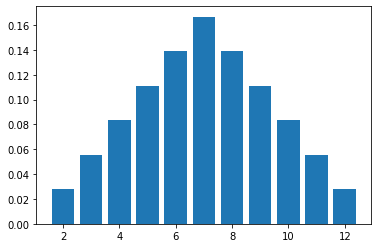

In [17]:
probabilidad = [c/36 for c in conteo.values()]

plt.bar(conteo.keys(), probabilidad)

plt.show()

### Distribución Normal

La distribución normal (distribución gaussiana o distribución de campana) es una distribución que tiene la característica de:

$$media = mediana = moda$$

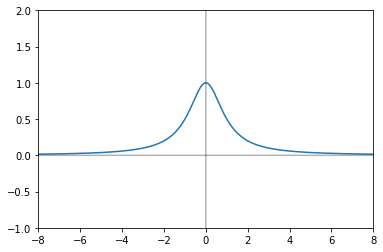

In [25]:
x = np.linspace(-10, 10, 1_00000)

y = 1/(x**2 + 1)

# Curva
plt.plot(x, y)

# Eje X
plt.plot(x, np.zeros(len(x)), color = "black", alpha = 0.3)

# Eje Y
plt.plot(np.zeros(len(x)), x, color = "black", alpha = 0.3)

plt.ylim(-1, 2)
plt.xlim(-8, 8)
plt.show()

In [26]:
print(f"Media: {np.mean(x)}")
print(f"Mediana: {np.median(x)}")
print(f"Moda: {stats.mode(y)[0][0]}")

Media: 7.275957614183426e-16
Mediana: 8.881784197001252e-16
Moda: 0.009900990099009901


C:\Users\botic\AppData\Local\Temp/ipykernel_19572/2924817156.py:3: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  print(f"Moda: {stats.mode(y)[0][0]}")


**El ejemplo de los 2 dados sigue una distribución normal.**

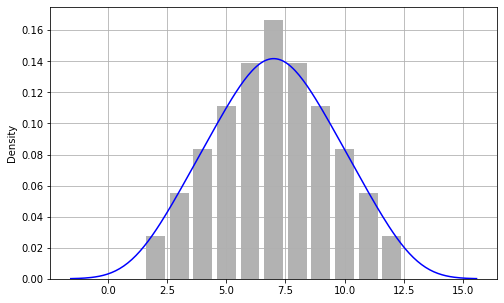

In [27]:
plt.figure(figsize = (8, 5))

plt.bar(conteo.keys(), probabilidad, color = "black", alpha = 0.3)
sns.kdeplot(x = resultados_suma, color = "blue")

plt.grid()
plt.show()

In [28]:
print(f"Media: {np.mean(resultados_suma)}")
print(f"Mediana: {np.median(resultados_suma)}")
print(f"Moda: {stats.mode(resultados_suma)[0][0]}")

print(f"std: {np.std(resultados_suma)}")

Media: 7.0
Mediana: 7.0
Moda: 7
std: 2.41522945769824


C:\Users\botic\AppData\Local\Temp/ipykernel_19572/1228076216.py:3: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  print(f"Moda: {stats.mode(resultados_suma)[0][0]}")


### Estandarización

La estandarización es el proceso de transformación de una variable con **`media != 0`** y con **`std != 1`** a **`media == 0`** y **`std == 1`**.

Para esto, debemos transformar cada valor, siguiendo la siguiente formula: 

$$\frac{x_{i} - mean(x)}{std(x)}$$

**Todas las distribuciones pueden ser estandarizadas.**

In [29]:
print(resultados_suma)

[2, 3, 4, 5, 6, 7, 3, 4, 5, 6, 7, 8, 4, 5, 6, 7, 8, 9, 5, 6, 7, 8, 9, 10, 6, 7, 8, 9, 10, 11, 7, 8, 9, 10, 11, 12]


In [30]:
media = np.mean(resultados_suma)
media

7.0

In [32]:
std = np.std(resultados_suma)
std

2.41522945769824

In [33]:
resultados_estandar = [(x - media) / std for x in resultados_suma]

print(resultados_estandar)

[-2.0701966780270626, -1.65615734242165, -1.2421180068162376, -0.828078671210825, -0.4140393356054125, 0.0, -1.65615734242165, -1.2421180068162376, -0.828078671210825, -0.4140393356054125, 0.0, 0.4140393356054125, -1.2421180068162376, -0.828078671210825, -0.4140393356054125, 0.0, 0.4140393356054125, 0.828078671210825, -0.828078671210825, -0.4140393356054125, 0.0, 0.4140393356054125, 0.828078671210825, 1.2421180068162376, -0.4140393356054125, 0.0, 0.4140393356054125, 0.828078671210825, 1.2421180068162376, 1.65615734242165, 0.0, 0.4140393356054125, 0.828078671210825, 1.2421180068162376, 1.65615734242165, 2.0701966780270626]


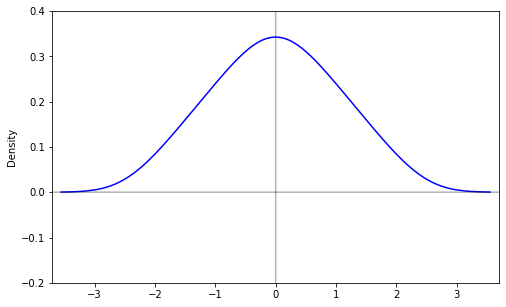

In [34]:
plt.figure(figsize = (8, 5))

# Curva
sns.kdeplot(resultados_estandar, color = "blue")

# Eje X
plt.plot(x, np.zeros(len(x)), color = "black", alpha = 0.3)

# Eje Y
plt.plot(np.zeros(len(x)), x, color = "black", alpha = 0.3)

plt.xlim(-3.7, 3.7)
plt.ylim(-0.2, 0.4)
plt.show()

**Ahora la distribución esta centrada en 0, tiene media = mediana = moda = 0 y desviación estandar = 1.**

In [35]:
print(f"Media: {np.mean(resultados_estandar)}")
print(f"Mediana: {np.median(resultados_estandar)}")
print(f"Moda: {stats.mode(resultados_estandar)[0][0]}")

print(f"std: {np.std(resultados_estandar)}")

Media: 2.4671622769447922e-17
Mediana: 0.0
Moda: 0.0
std: 1.0


C:\Users\botic\AppData\Local\Temp/ipykernel_19572/485964229.py:3: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  print(f"Moda: {stats.mode(resultados_estandar)[0][0]}")


### Teorema de limite central

Por lo general, trabajaremos con muestras de una población, estas muestras tendrán: media, mediana, moda, std, min, max...

El Teorema de limite central establece que, si tenemos suficientes muestras diferentes de una población, la distribución de sus medias seguirá una **distribución normal**. A la distribución de medias se le conoce como **distribución de medias muestrales**.

Además de que la media de las medias muestrales se aproximará más aún a la media de la población. Todo esto se puede inferir sin saber cual es la población.

In [40]:
# Supongamos que tenemos la siguiente lista de medias de diferentes muestras de población:

medias_muestrales = sorted(np.random.random(30)*28000)

print(medias_muestrales)

[330.7667984472644, 369.47124041617707, 2749.894820126698, 2755.9652340061566, 2911.418077615145, 2992.5287673325397, 4471.033372607476, 4518.251718112816, 4815.215930863173, 7495.086050420094, 7985.86311348583, 8783.148777138194, 9887.205215878188, 10795.45020716802, 12044.890272970588, 12712.657825284687, 12981.360913401932, 13039.548495110237, 14767.383514734347, 14825.055397871438, 15700.76170052522, 16001.44226094731, 16187.354512440033, 18409.257242095486, 19126.81094619137, 22389.92754211901, 25522.3132979974, 25733.313370028103, 25800.777188927914, 26636.05114516605]


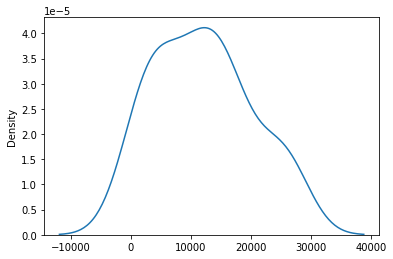

In [41]:
sns.kdeplot(medias_muestrales)
plt.show()

In [42]:
print(f"Media: {np.mean(medias_muestrales)}")
print(f"Mediana: {np.median(medias_muestrales)}")
print(f"Moda: {stats.mode(medias_muestrales)[0][0]}")

print(f"std: {np.std(medias_muestrales)}")

Media: 12091.340164980964
Mediana: 12378.774049127638
Moda: 330.7667984472644
std: 7883.0703150906475


C:\Users\botic\AppData\Local\Temp/ipykernel_19572/3052902124.py:3: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  print(f"Moda: {stats.mode(medias_muestrales)[0][0]}")


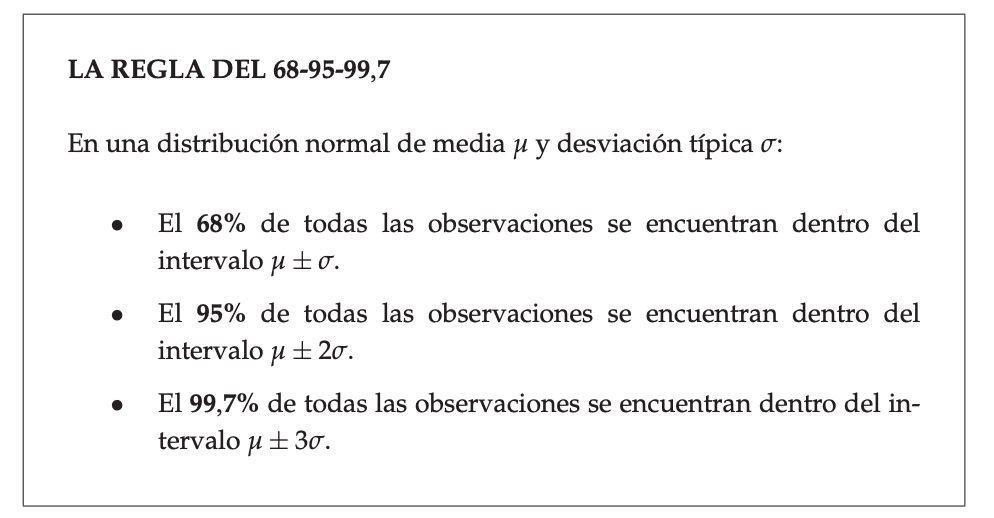

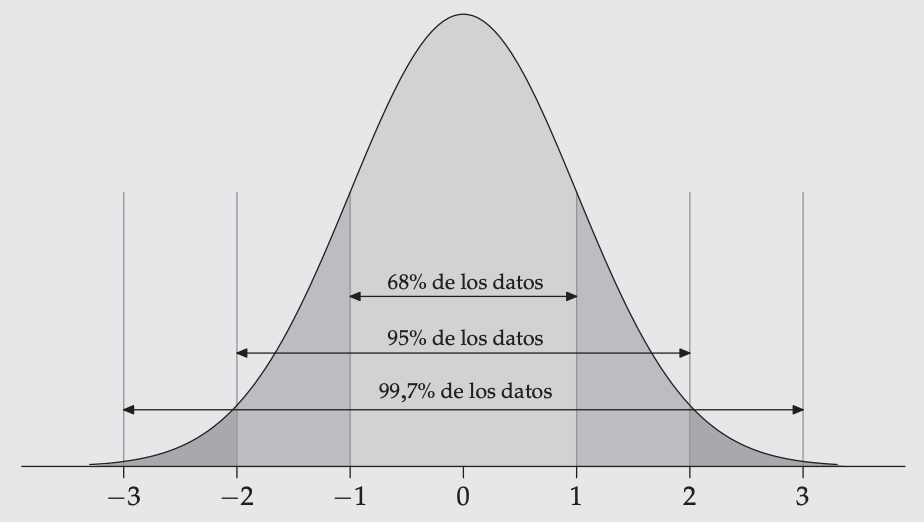

### Correlación entre 2 variables

El método que se va a utilizar para calcular la correlación entre 2 variables es el coeficiente de correlación lineal de pearson. El cual mide únicamente la relación entre ambas variables sin considerar dependencias y siempre buscando una correlación lineal.

Para poder calcular la correlación utilizamos el cálculo de la covarianza entre ambas variables.

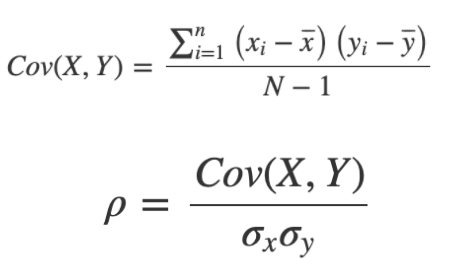

Donde el valor de **`p`** puede tomar valores desde -1 hasta +1 y de acuerdo a su valor se pueden asignar las siguientes categorías:

- 0: asociación nula.
- 土 0.1: asociación pequeña.
- 土 0.3: asociación mediana.
- 土 0.5: asociación moderada.
- 土 0.7: asociación alta.
- 土 0.9: asociación muy alta.

In [43]:
iris = sns.load_dataset("iris")

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [44]:
iris.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


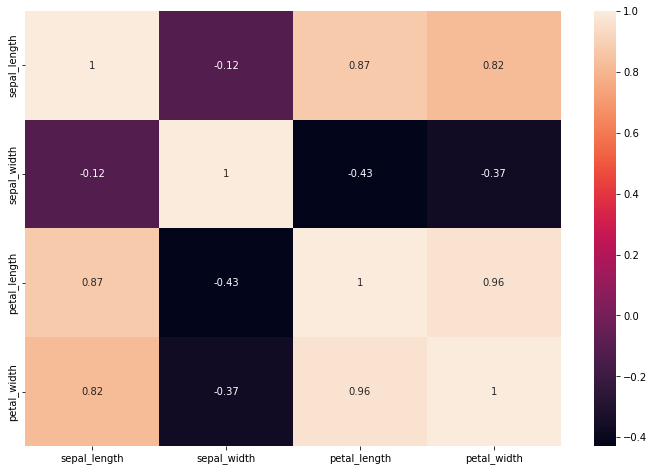

In [45]:
plt.figure(figsize = (12, 8))

sns.heatmap(iris.corr(), annot = True)

plt.show()

### Coeficiente de asimetría (Skewness)

Es una medida de la asimetría (falta de simetría) de un conjunto de datos numéricos $x_1, x_2, x_3... x_n$. 

El coeficiente de asimetría se define con la siguiente ecuación:

$$sk = \frac{1}{s^3}(\frac{1}{n}\sum_{n}^{i=1}(x_i - \bar{x})^3) $$

El coeficiente de asimetría **no posee unidad de medición, es un número que puede ser positivo, negativo o cero.**

Su signo es positivo cuando la gráfica de frecuencias de los datos presenta una cola más alargada hacia la derecha de la media. 

En cambio, el signo del coeficiente de asimetría es negativo cuando la gráfica de frecuencias presenta una cola más alargada hacia la izquierda de la media.

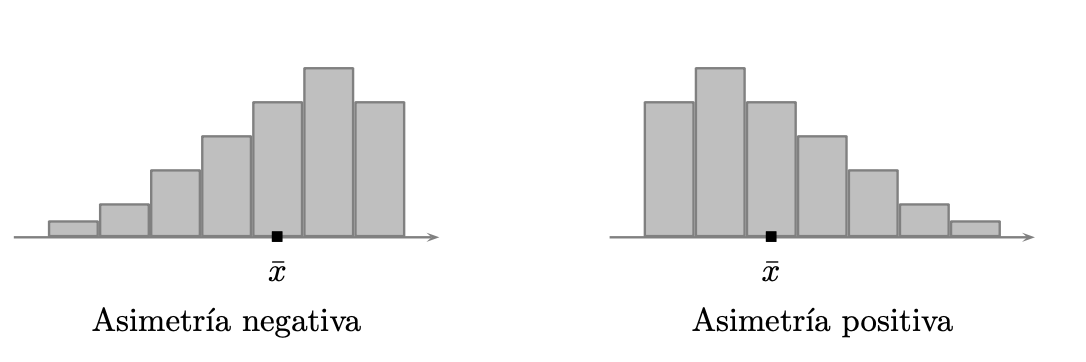

Por consiguiente, en el caso simétrico, cuando por cada dato $x_i$, a la izquierda de $\bar{x}$ hay otro dato a la derecha y a la misma distancia de este punto central, el coeficiente de asimetría es cero.

Columna: sepal_length	 Skewness: 0.3117530585022963


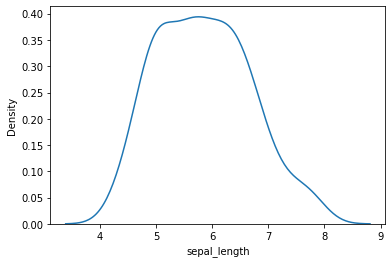

Columna: sepal_width	 Skewness: 0.31576710633893473


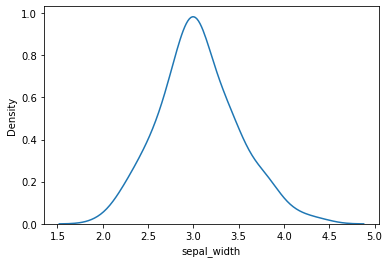

Columna: petal_length	 Skewness: -0.2721276664567214


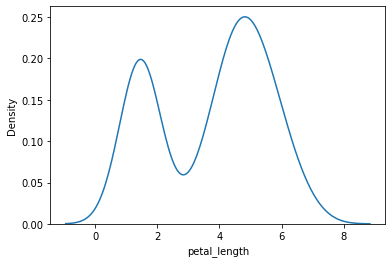

Columna: petal_width	 Skewness: -0.10193420656560036


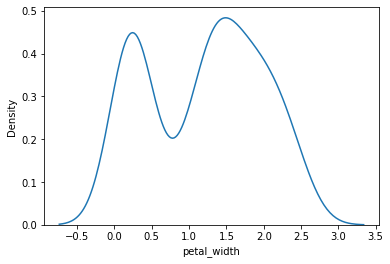

In [46]:
from scipy.stats import skew 

for col in iris.columns[:-1]:
    
    print(f"Columna: {col}\t Skewness: {skew(iris.loc[:, col])}")

    sns.kdeplot(iris.loc[:, col])

    plt.show()

### Curtosis (Kurtosis)

La curtosis es un número positivo que no tiene unidad de medición. Cuando una observación $x_i$ dista mucho de la media $\bar{x}$, al elevar esta distancia a la cuarta potencia  hace que se magnifiquen las distancias grandes, por lo tanto, una curtosis grande puede indicar un mayor número de datos alejados de la media, hacia uno u otro lado.

La curtorsis de una distribución normal estándar es igual a 3, la siguiente ecuación para calcular la kurtosis (llamada excess kurtosis) es:

$$k3 = \frac{1}{s^4}(\frac{1}{n}\sum_{n}^{i=1}(x_i - \bar{x})^4)-3$$

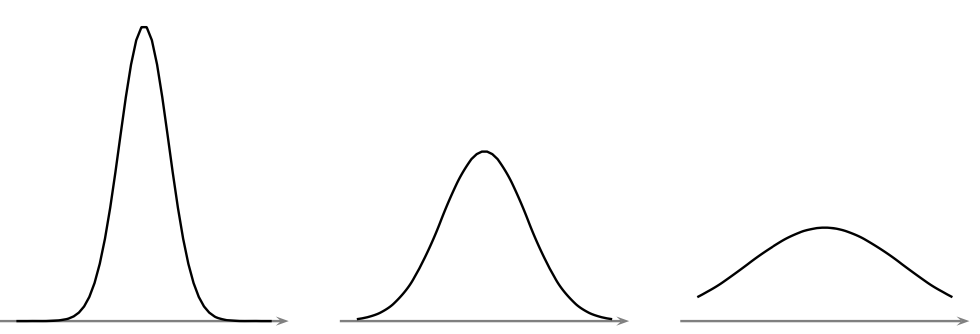

1. Leptocúrtica ($k_3 > 0$): Decaimiento rápido, cola ligera.
2. Mesocúrtica ($k_3=0$): Curva normal.
3. Paticúrtica ($k_3<0$ ): Decaimiento lento.

Columna: sepal_length	 Kurtosis: -0.5735679489249765


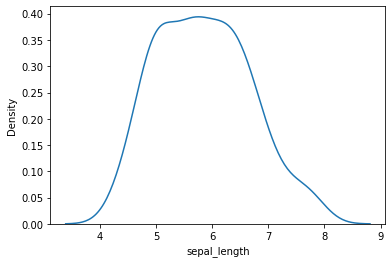

Columna: sepal_width	 Kurtosis: 0.18097631752246768


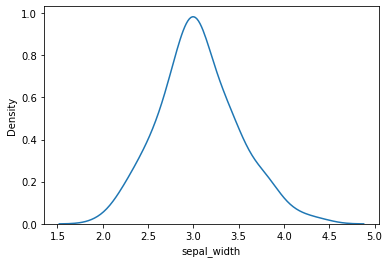

Columna: petal_length	 Kurtosis: -1.3955358863990055


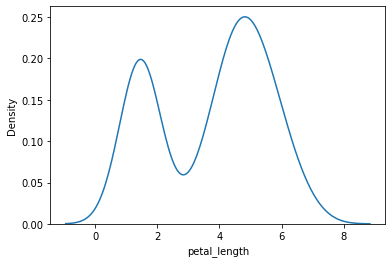

Columna: petal_width	 Kurtosis: -1.336067405231553


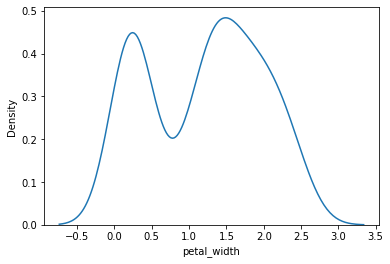

In [47]:
from scipy.stats import kurtosis

for col in iris.columns[:-1]:
    
    print(f"Columna: {col}\t Kurtosis: {kurtosis(iris.loc[:, col])}")

    sns.kdeplot(iris.loc[:, col])

    plt.show()

In [ ]:
################################################################################################################################